# KR1: Plot an implemented function to be integrated based on a given 1D problem (1st-order ODE).

# KR2: Implement a 1D ODE solver using the Euler method using functions just like the ODE solver packages. 

# KR3: Plot the solution obtained via the Euler method.

In [2]:
using DifferentialEquations
using Plots

Let's consider pendulum model consisting of a rod of length l and mass m:

\begin{aligned} \frac{\mathrm{d}\theta(t)}{\mathrm{d}t} &= \omega(t)\\ \frac{\mathrm{d}\omega(t)}{\mathrm{d}t} &= - c\sin\theta(t) - b\omega(t) \end{aligned}


where θ and ω are the angle measured from the equilibrium position and the angular velocity, respectively, while b and c are known constants.

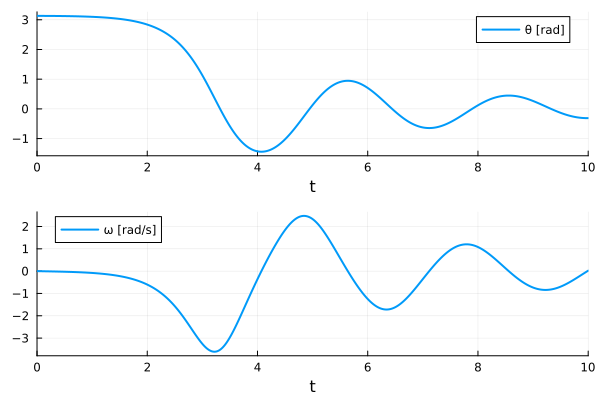

In [103]:
b=0.50
c=5.00

function pendulum!(du,u,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -c*sin(u[1]) - b*u[2] # ω'(t) = -c sin θ(t) - b* ω(t)
end

θ₀ = pi- 0.01                       # initial angle
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval
                   # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

In [104]:
function euler(f, y0, t)
    n = length(t)
    y = zeros((n, length(y0)))
    y[1,:] = y0
    for i in 1:n-1
        h = t[i+1] - t[i]
        y[i+1,:] = y[i,:] + h * f(y[i,:], t[i])
    end
    return y
end

function eul_pend(y, t)
    return [y[2], (-b * y[2]) - (c * sin(y[1]))]
end

eul_pend (generic function with 1 method)

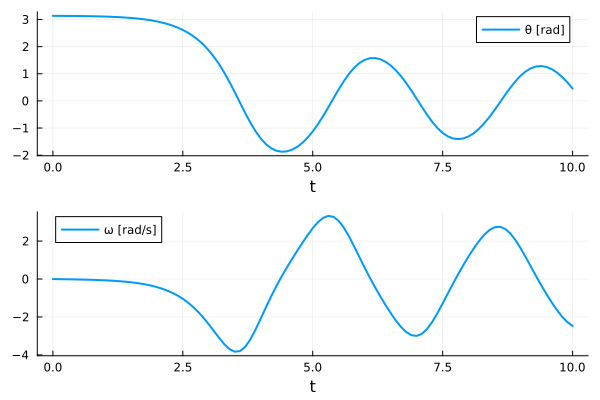

In [105]:
t = LinRange(0,10,101) 
sol1 = euler(eul_pend,u₀,t);
plot(t,sol1,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))


# KR4: Compare the custom  created from the default ODE solver of the `DifferentialEquations.jl` package

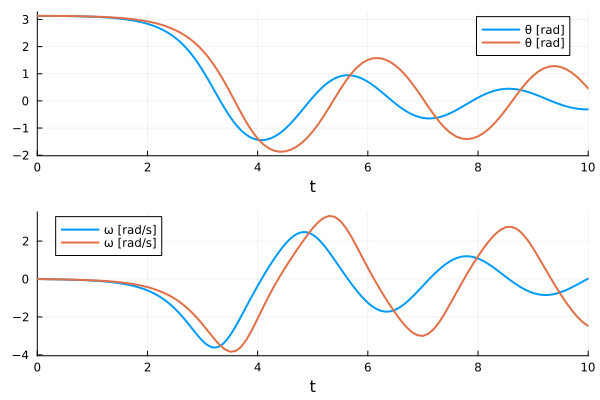

In [107]:
plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))
plot!(t,sol1,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

Red line: Euler method
Blue line: ODE solver

Upon inspection, the two methods coincide when 0 < t < 2. If we actually increase the points, the Euler method will produce a more accurate approximation.

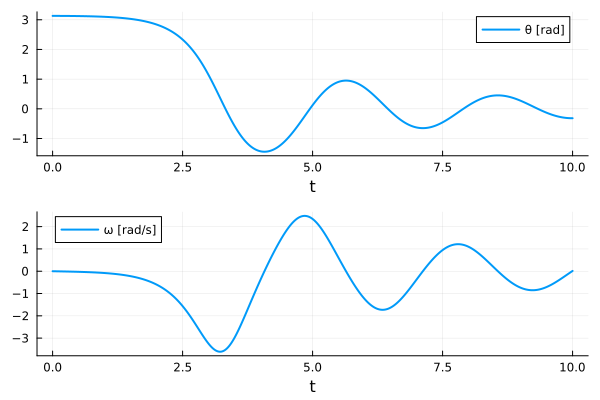

In [108]:
t = LinRange(0,10,12001) 
sol1 = euler(eul_pend,u₀,t);
plot(t,sol1,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

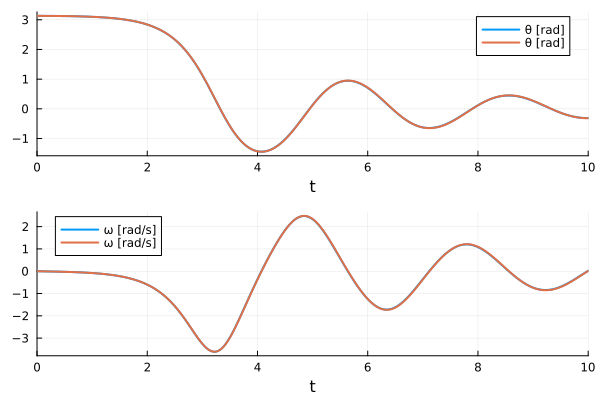

In [109]:
plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))
plot!(t,sol1,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

As seen from the figure above, the two lines perfectly coincide. 